# PLS

## Model

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt

In [34]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 42)

In [63]:
pls_model = PLSRegression().fit(X_train, y_train)

In [64]:
pls_model.coef_

/Users/batuhanbilgili/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[ 25.20695782],
       [ 43.88920947],
       [ 13.79855318],
       [ 34.15765999],
       [ 31.80316738],
       [ 34.65081411],
       [  9.63142299],
       [ 27.37550501],
       [ 34.90592068],
       [ 31.89620351],
       [ 35.09490051],
       [ 38.59554052],
       [ 20.64420897],
       [ 61.88280705],
       [  5.03993203],
       [ -7.838709  ],
       [ 26.23526072],
       [-55.64124545],
       [ 22.32390291]])

## Tahmin

In [65]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
176,181.0,58.0,6.0,34.0,23.0,22.0,1.0,181.0,58.0,6.0,34.0,23.0,22.0,88.0,0.0,3.0,1,1,1
107,566.0,154.0,22.0,76.0,84.0,43.0,14.0,6100.0,1583.0,131.0,743.0,693.0,300.0,316.0,439.0,10.0,0,1,0
90,314.0,83.0,13.0,39.0,46.0,16.0,5.0,1457.0,405.0,28.0,156.0,159.0,76.0,533.0,40.0,4.0,0,1,0
245,327.0,68.0,13.0,42.0,29.0,45.0,18.0,3949.0,939.0,78.0,438.0,380.0,466.0,659.0,53.0,7.0,0,0,0
17,190.0,46.0,2.0,24.0,8.0,15.0,5.0,479.0,102.0,5.0,65.0,23.0,39.0,102.0,177.0,16.0,0,1,0


In [66]:
pls_model.predict(X_train)[:10]

array([[119.7850198 ],
       [833.10357812],
       [285.12982504],
       [627.31511285],
       [-26.1300694 ],
       [191.46161191],
       [ 18.424432  ],
       [345.38976084],
       [521.38156313],
       [264.39247507]])

In [67]:
y_pred = pls_model.predict(X_train)

In [68]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

330.7135573335159


In [69]:
r2_score(y_train, y_pred)

0.4811690143527575

In [70]:
y_pred = pls_model.predict(X_test)

In [71]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

315.3636380300323


## Model Tuning

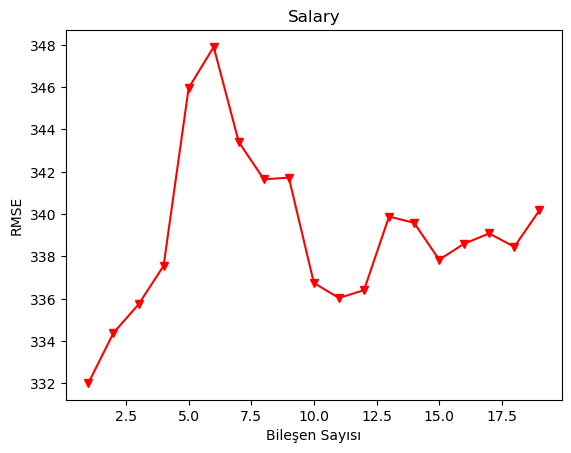

In [72]:
# CV

cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Hata hesaplamak için döngü

RMSE = []

for i in range(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring="neg_mean_squared_error"))
    RMSE.append(score)

# SOnuçların Görselleştirilmesi
RMSE_mean = np.mean(RMSE, axis=1)
plt.plot(np.arange(1, X_train.shape[1] + 1), RMSE_mean, "-v", c='r')
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Salary")
plt.show()

In [84]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [85]:
y_pred = pls_model.predict(X_test)

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred))

315.3636380300323